**Chapter 2 – End-to-end Machine Learning project**

*Welcome to Machine Learning Housing Corp.! Your task is to predict median house values in Californian districts, given a number of features from these districts.*

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

## 셋업

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20.

In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# 그래프를 그리기 위한 셋업
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그래프 저장 경로
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

# 그래프 저장
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## 데이터 가져오기

### 클래스 import

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import urllib.request
import tarfile
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import Pipeline # 파이프라인을 쓰지 말고 함수만 사용해서 코드를 고쳐보기!
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### 데이터 가져오기

In [4]:
# 데이터 가져오기(캘리포니아 집값 데이터) -> 회귀 수행
import urllib.request
url = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz"
urllib.request.urlretrieve(url, "housing.tgz")

('housing.tgz', <http.client.HTTPMessage at 0x1fe58fb8c40>)

In [5]:
# 파일 오픈
import tarfile
tar = tarfile.open("housing.tgz")
tar.extractall()
tar.close()

In [6]:
# csv 파일 오픈
# 샘플: district 단위
housing = pd.read_csv("housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### 데이터셋을 다른 폴더에 저장하기(선택)

===============================================================================

- if you want to keep the dataset in a separate directory,

In [7]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [8]:
fetch_housing_data()

In [9]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [10]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


===============================================================================

## 데이터셋 분석

각 샘플은 하나의 district를 나타냄

In [11]:
# 피쳐 확인
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [12]:
# 형상 확인 -> 샘플 20640개, 피쳐 10개
housing.shape

(20640, 10)

In [13]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [14]:
# value_counts(): Counter 기능 수행
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [15]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


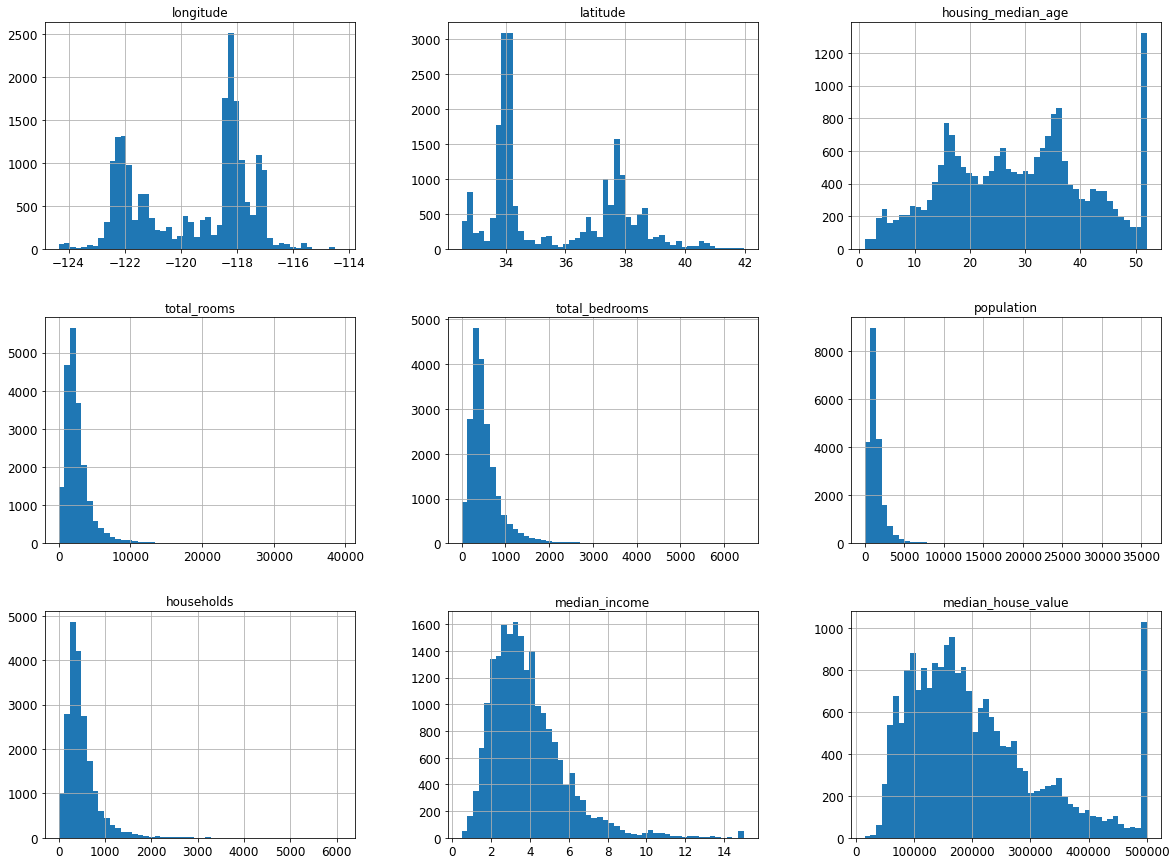

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

- Notice that:
    - median income is not expressed in USD (scaled and capped at 15 for higher and 0.5 for lower. (number actually represents thounds of dollars)
    - the housing median age and the median house value are also capped (if you need precise prediction beyond 15,000 USD, you willhave to either collect proper labeled data or remove cropped ones from traing and test dataset.)
    - these attributes have very different scales (need scaling)
    - many histograms are tail-heavy (may make it harder tp detect patterns (may need transformation)

### 훈련-테스트 데이터셋 분리(train_test_split)

In [17]:
# 랜덤 넘버 시드 설정
np.random.seed(42)

In [18]:
# 훈련/테스트 데이터 분리
from sklearn.model_selection import train_test_split
# 데이터셋을 0.8:0.2로 분리
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42) 

In [19]:
train_set.shape, test_set.shape

((16512, 10), (4128, 10))

In [20]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


- Now, we assume <span style="color:red">median income is a very important attribute</span> to predict median housing prices.
- We create a new category (income) with 5 categories for Startified Samspling.

<AxesSubplot:>

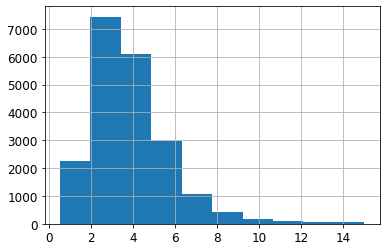

In [21]:
housing["median_income"].hist()

In [22]:
# 5개 구간으로 분리
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [23]:
housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

<AxesSubplot:>

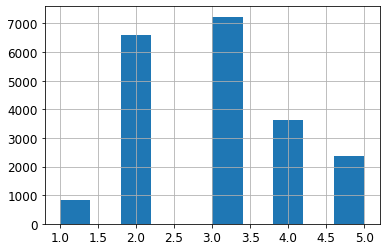

In [24]:
housing["income_cat"].hist()

### Train-Test 데이터 비율이 같게 데이터셋 분리(StratifiedShuffleSplit)

In [25]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

#### 비율 확인

In [26]:
# 테스트 데이터셋
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [27]:
# 훈련 데이터셋
strat_train_set["income_cat"].value_counts() / len(strat_train_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114402
1    0.039850
Name: income_cat, dtype: float64

In [28]:
# 전체 데이터셋
housing["income_cat"].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [29]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

random_train_set, random_test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(random_test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [30]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039729,0.040213,0.973236,-0.243309
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114583,0.109496,-4.318374,0.127011


- as you can see, the test set generated using startified sampling has income category proportions almost identical to those in the full dataset.

In [31]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [32]:
# 형상 확인
strat_train_set.shape, strat_test_set.shape

((16512, 10), (4128, 10))

## 데이터 시각화(데이터 탐색 및 분석)

In [33]:
housing = strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

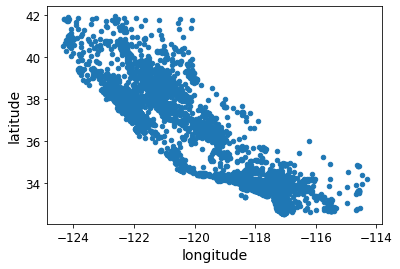

In [34]:
housing.plot(kind="scatter", x="longitude", y="latitude")

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

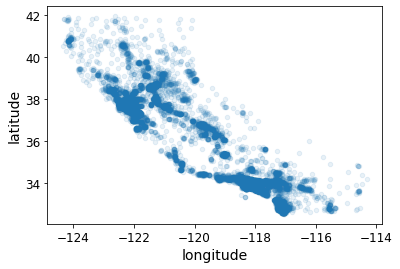

In [35]:
# 투명도 부여
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

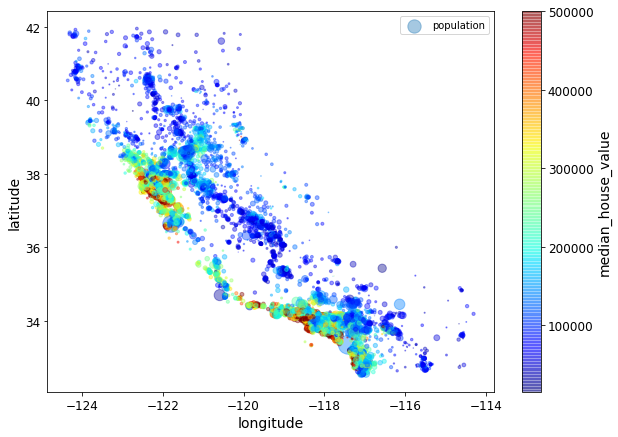

In [36]:
# 
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()

- radius of each circle: district's population (option s)
- color: price (option c)
- we can see the house prices are very much related to the loation and to the population density.

In [37]:
# Download the California image
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "end_to_end_project")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('.\\images\\end_to_end_project\\california.png',
 <http.client.HTTPMessage at 0x1fe5a22d250>)

In [38]:
housing['latitude'].max(), housing['latitude'].min()

(41.95, 32.54)

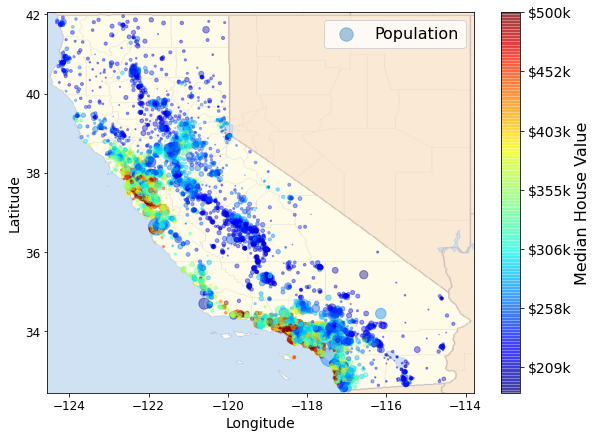

In [39]:
import matplotlib.image as mpimg
california_img=mpimg.imread(os.path.join(images_path, filename))
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                  s=housing['population']/100, label="Population",
                  c="median_house_value", cmap=plt.get_cmap("jet"),
                  colorbar=False, alpha=0.4)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
plt.show()

In [40]:
housing.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [41]:
# 상관 관계 행렬 (얼마나 정비례하는지?)
corr_matrix = housing.corr()

In [42]:
corr_matrix.sort_values(by="median_house_value", ascending=False)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
median_house_value,-0.046952,-0.144846,0.108680,0.133371,0.047338,-0.026199,0.064481,0.687691,1.000000
median_income,-0.015325,-0.080775,-0.119526,0.197307,-0.011084,0.004113,0.010622,1.000000,0.687691
total_rooms,0.036418,-0.028048,-0.356737,1.000000,0.929195,0.852256,0.916042,0.197307,0.133371
housing_median_age,-0.103278,0.006478,1.000000,-0.356737,-0.316702,-0.289229,-0.297680,-0.119526,0.108680
households,0.046089,-0.063534,-0.297680,0.916042,0.977683,0.902676,1.000000,0.010622,0.064481
total_bedrooms,0.062633,-0.060123,-0.316702,0.929195,1.000000,0.870117,0.977683,-0.011084,0.047338
population,0.089086,-0.100351,-0.289229,0.852256,0.870117,1.000000,0.902676,0.004113,-0.026199
longitude,1.000000,-0.923714,-0.103278,0.036418,0.062633,0.089086,0.046089,-0.015325,-0.046952
latitude,-0.923714,1.000000,0.006478,-0.028048,-0.060123,-0.100351,-0.063534,-0.080775,-0.144846


- or

In [43]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687691
total_rooms           0.133371
housing_median_age    0.108680
households            0.064481
total_bedrooms        0.047338
population           -0.026199
longitude            -0.046952
latitude             -0.144846
Name: median_house_value, dtype: float64

- it measures only linear correlations for numerical features
- another way to check the correlation is to see pair-wise scatter graphs

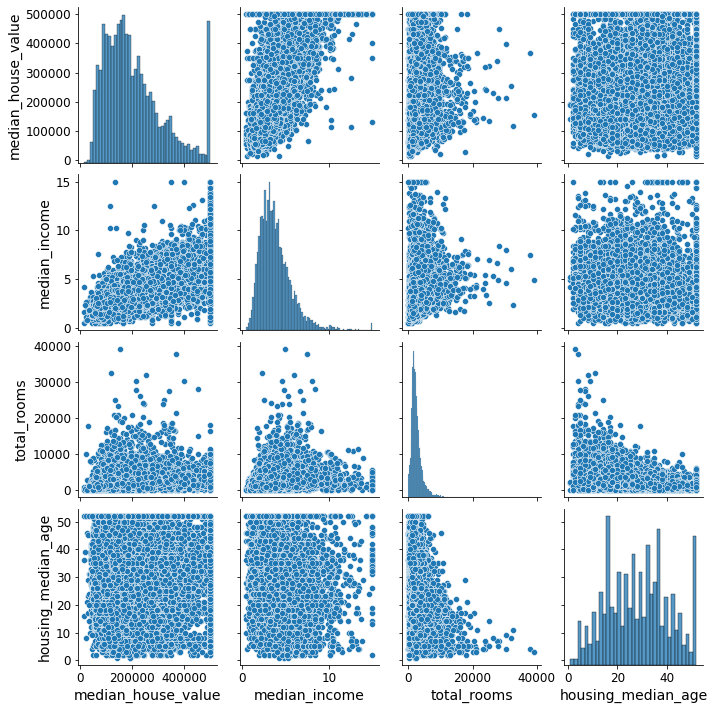

In [44]:
import seaborn as sns

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
sns.pairplot(housing[attributes])

- or

Saving figure scatter_matrix_plot


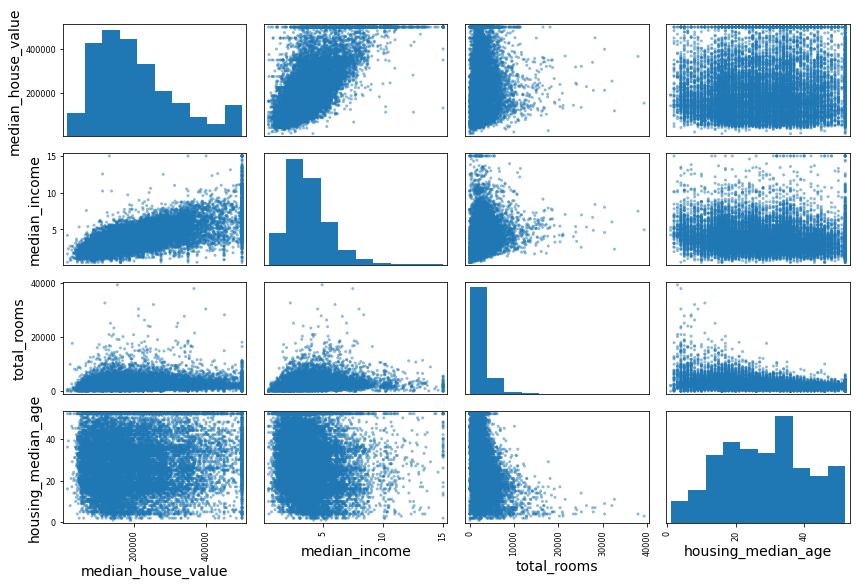

In [45]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

- seems that the most promising attribute to predict the medium house value is the medium income

Saving figure income_vs_house_value_scatterplot


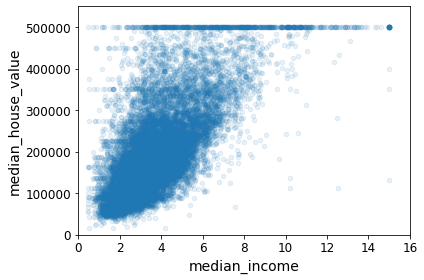

In [46]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])
save_fig("income_vs_house_value_scatterplot")

- now we see:
    - very strong correlation
    - price cap at 500,000 usd (horizantal line)
    - also few more straight lines around 450, 350, 280 K-USD

- seems that we can make more meaningful attributes, such as

In [47]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [48]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17080,-122.19,37.48,38.0,1300.0,269.0,608.0,292.0,4.5568,286900.0,NEAR BAY
7348,-118.16,33.97,39.0,1444.0,447.0,1890.0,416.0,2.1181,176600.0,<1H OCEAN
6188,-117.92,34.10,35.0,2994.0,603.0,1933.0,561.0,4.0052,160700.0,<1H OCEAN
13945,-117.20,34.26,17.0,9419.0,1455.0,1382.0,459.0,6.2233,230900.0,INLAND
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,95800.0,INLAND


In [49]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [50]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687691
rooms_per_household         0.145258
total_rooms                 0.133371
housing_median_age          0.108680
households                  0.064481
total_bedrooms              0.047338
population_per_household   -0.024885
population                 -0.026199
longitude                  -0.046952
latitude                   -0.144846
bedrooms_per_room          -0.255939
Name: median_house_value, dtype: float64

- we see that
   - new attributes (rooms_per_household, bedrooms_per_room) are more informative

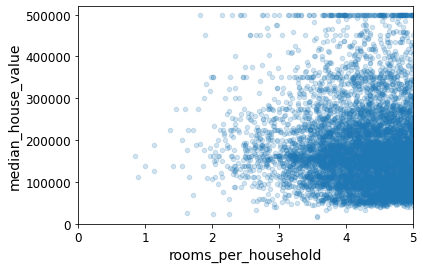

In [51]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
             alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

In [52]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16349.00000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16349.000000,16512.000000
mean,-119.553467,35.619624,28.486676,2635.966388,538.12643,1422.971596,499.279857,3.868991,206838.327035,5.442943,0.213019,3.036816
std,2.003684,2.138291,12.554158,2150.726896,415.60066,1128.464558,376.607586,1.896538,115349.090877,2.620259,0.057904,9.898801
min,-124.350000,32.540000,1.000000,2.000000,1.00000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.100000,0.692308
25%,-121.780000,33.930000,18.000000,1453.000000,297.00000,789.000000,281.000000,2.566700,119675.000000,4.441216,0.175241,2.429175
50%,-118.480000,34.250000,29.000000,2143.000000,436.00000,1169.000000,411.000000,3.529000,179700.000000,5.233066,0.203187,2.816157
75%,-118.000000,37.710000,37.000000,3157.250000,650.00000,1728.000000,607.000000,4.746450,265300.000000,6.055028,0.239821,3.277034
max,-114.310000,41.950000,52.000000,39320.000000,6445.00000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


## 머신러닝을 위한 최종 데이터 준비(Cleaning and Transform)

In [53]:
housing = strat_train_set.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = strat_train_set["median_house_value"].copy()

In [54]:
# 열(특징) 방향
housing.isnull().any(0)

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
ocean_proximity       False
dtype: bool

In [52]:
# 행(샘플) 방향
housing.isnull().any(1)

17080    False
7348     False
6188     False
13945    False
13656     True
         ...  
4250     False
12702    False
13585    False
15670    False
7755     False
Length: 16512, dtype: bool

In [53]:
housing['total_bedrooms'].isnull().sum()

163

### 누락값에 대한 처리

- we have options:

   - option 1: remove the samples that have null
   - option 2: remove the attribute (total_bedroom)
   - option 3: replace NaN's with the mean or median value


In [54]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND
19932,-119.33,36.30,11.0,3045.0,NaN,1563.0,516.0,5.4337,INLAND
19150,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN
13933,-117.31,34.25,29.0,4610.0,NaN,1569.0,592.0,2.7663,INLAND
7806,-118.09,33.89,42.0,991.0,NaN,717.0,219.0,4.0926,<1H OCEAN


In [55]:
sample_incomplete_rows.dropna(subset=["total_bedrooms"]).head()  # option 1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [56]:
sample_incomplete_rows.drop("total_bedrooms", axis=1)  # option 2

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
13656,-117.30,34.05,6.0,2155.0,1039.0,391.0,1.6675,INLAND
19932,-119.33,36.30,11.0,3045.0,1563.0,516.0,5.4337,INLAND
19150,-122.70,38.35,14.0,2313.0,954.0,397.0,3.7813,<1H OCEAN
13933,-117.31,34.25,29.0,4610.0,1569.0,592.0,2.7663,INLAND
7806,-118.09,33.89,42.0,991.0,717.0,219.0,4.0926,<1H OCEAN


In [57]:
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # option 3

In [58]:
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
13656,-117.30,34.05,6.0,2155.0,436.0,1039.0,391.0,1.6675,INLAND
19932,-119.33,36.30,11.0,3045.0,436.0,1563.0,516.0,5.4337,INLAND
19150,-122.70,38.35,14.0,2313.0,436.0,954.0,397.0,3.7813,<1H OCEAN
13933,-117.31,34.25,29.0,4610.0,436.0,1569.0,592.0,2.7663,INLAND
7806,-118.09,33.89,42.0,991.0,436.0,717.0,219.0,4.0926,<1H OCEAN


- when choosing option 3:
  - should save the median value. You will need it later to replace NaN in the testing set, and also once the system goes live.

#### Imputer

사이킷런은 누락값을 대체하기 위한 Imputer 클래스를 제공한다. 

In [59]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

Remove the text attribute because median can only be calculated on numerical attributes:

In [60]:
housing_num = housing.drop("ocean_proximity", axis=1)
# alternatively: housing_num = housing.select_dtypes(include=[np.number])

In [61]:
imputer.fit(housing_num)
imputer.statistics_

array([-118.48 ,   34.25 ,   29.   , 2143.   ,  436.   , 1169.   ,
        411.   ,    3.529])

Check that this is the same as manually computing the median of each attribute:

In [62]:
housing.median().values

array([-118.48 ,   34.25 ,   29.   , 2143.   ,  436.   , 1169.   ,
        411.   ,    3.529])

Transform the training set:

In [63]:
X = imputer.transform(housing_num)    # array

In [65]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing.index)

In [66]:
sample_incomplete_rows.index.values

array([13656, 19932, 19150, 13933,  7806])

In [67]:
housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13656,-117.30,34.05,6.0,2155.0,436.0,1039.0,391.0,1.6675
19932,-119.33,36.30,11.0,3045.0,436.0,1563.0,516.0,5.4337
19150,-122.70,38.35,14.0,2313.0,436.0,954.0,397.0,3.7813
13933,-117.31,34.25,29.0,4610.0,436.0,1569.0,592.0,2.7663
7806,-118.09,33.89,42.0,991.0,436.0,717.0,219.0,4.0926


In [68]:
imputer.strategy

'median'

In [70]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

In [71]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17080,-122.19,37.48,38.0,1300.0,269.0,608.0,292.0,4.5568
7348,-118.16,33.97,39.0,1444.0,447.0,1890.0,416.0,2.1181
6188,-117.92,34.10,35.0,2994.0,603.0,1933.0,561.0,4.0052
13945,-117.20,34.26,17.0,9419.0,1455.0,1382.0,459.0,6.2233
13656,-117.30,34.05,6.0,2155.0,436.0,1039.0,391.0,1.6675


Now let's preprocess the categorical input feature, `ocean_proximity`:

In [72]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.value_counts()

ocean_proximity
<1H OCEAN          7308
INLAND             5274
NEAR OCEAN         2142
NEAR BAY           1783
ISLAND                5
dtype: int64

In [73]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[3.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.]])

In [74]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [75]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

By default, the `OneHotEncoder` class returns a sparse array, but we can convert it to a dense array if needed by calling the `toarray()` method:

In [76]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.]])

Alternatively, you can set `sparse=False` when creating the `OneHotEncoder`:

In [77]:
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.]])

In [78]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

Let's create a custom transformer to add extra attributes:
- rooms_per_household = total_rooms/households
- bedrooms_per_room = total_bedrooms/total_rooms
- population_per_household = population/households

In [84]:
# from sklearn.base import BaseEstimator, TransformerMixin

col_names = ["total_rooms", "total_bedrooms", "population", "households"]
rooms_ix, bedrooms_ix, population_ix, households_ix = [
    housing.columns.get_loc(c) for c in col_names] # get the column indices

In [85]:
rooms_ix, bedrooms_ix, population_ix, households_ix

(3, 4, 5, 6)

- BaseEstimator: base class for all estimators in scikit-learn (has get_params() and set_params(**params))
- TransformerMixin: mixin class for all transformers in scikit-learn(has fit_transform(X))

In [ ]:
"""
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)
"""

'\nclass CombinedAttributesAdder(BaseEstimator, TransformerMixin):\n    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs\n        self.add_bedrooms_per_room = add_bedrooms_per_room\n    def fit(self, X, y=None):\n        return self  # nothing else to do\n    def transform(self, X):\n        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]\n        population_per_household = X[:, population_ix] / X[:, households_ix]\n        if self.add_bedrooms_per_room:\n            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]\n            return np.c_[X, rooms_per_household, population_per_household,\n                         bedrooms_per_room]\n        else:\n            return np.c_[X, rooms_per_household, population_per_household]\n\nattr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)\nhousing_extra_attribs = attr_adder.transform(housing.values)\n'

In [87]:
class CombinedAttributesAdder():
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]

        X = np.delete(X, [households_ix, rooms_ix, population_ix, bedrooms_ix], 1)

        return np.c_[X, rooms_per_household, population_per_household,
                    bedrooms_per_room]

attr_adder = CombinedAttributesAdder()
housing_extra_attribs = attr_adder.transform(housing_tr.values)

In [88]:
housing_extra_attribs.shape, housing_tr.shape

((16512, 7), (16512, 8))

Also, housing_extra_attribs is a NumPy array, we've lost the column names (unfortunately, that's a problem with Scikit-Learn). To recover a DataFrame, you could run this:

In [104]:
list(housing_tr.columns)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [105]:
new_cols = [elem for elem in list(housing_tr.columns) if elem not in col_names]
new_cols

['longitude', 'latitude', 'housing_median_age', 'median_income']

In [107]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17080,-122.19,37.48,38.0,1300.0,269.0,608.0,292.0,4.5568
7348,-118.16,33.97,39.0,1444.0,447.0,1890.0,416.0,2.1181
6188,-117.92,34.10,35.0,2994.0,603.0,1933.0,561.0,4.0052
13945,-117.20,34.26,17.0,9419.0,1455.0,1382.0,459.0,6.2233
13656,-117.30,34.05,6.0,2155.0,436.0,1039.0,391.0,1.6675


In [106]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=new_cols + ["rooms_per_household", "population_per_household", "bedrooms_per_room"],
    index=housing_tr.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,median_income,rooms_per_household,population_per_household,bedrooms_per_room
17080,-122.19,37.48,38.0,4.5568,4.452055,2.082192,0.206923
7348,-118.16,33.97,39.0,2.1181,3.471154,4.543269,0.309557
6188,-117.92,34.10,35.0,4.0052,5.336898,3.445633,0.201403
13945,-117.20,34.26,17.0,6.2233,20.520697,3.010893,0.154475
13656,-117.30,34.05,6.0,1.6675,5.511509,2.657289,0.202320


Now let's build a pipeline for preprocessing the numerical attributes:

In [112]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [110]:
housing_num_tr

array([[-1.31588226,  0.87005565,  0.75780567, ..., -0.37817569,
        -0.09644125, -0.10665981],
       [ 0.69547351, -0.77149164,  0.83746296, ..., -0.7525397 ,
         0.15219008,  1.54560931],
       [ 0.81525648, -0.71069359,  0.51883377, ..., -0.04047228,
         0.04130092, -0.19552899],
       ...,
       [ 1.12469583, -0.70134005,  1.15609216, ..., -0.27023312,
         0.03904028,  0.68961387],
       [-1.44065619,  1.01971238,  1.87300785, ..., -0.58337457,
        -0.13186826,  1.21892852],
       [ 0.71543734, -0.79955228,  0.51883377, ..., -0.16905064,
         0.00361318, -0.27004362]])

- ColumnTransformer: Applies transformers to columns of an array or pandas DataFrame.

In [111]:
list(housing_num)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [114]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [115]:
housing_prepared

array([[-1.31588226,  0.87005565,  0.75780567, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.69547351, -0.77149164,  0.83746296, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.81525648, -0.71069359,  0.51883377, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.12469583, -0.70134005,  1.15609216, ...,  0.        ,
         0.        ,  0.        ],
       [-1.44065619,  1.01971238,  1.87300785, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.71543734, -0.79955228,  0.51883377, ...,  0.        ,
         0.        ,  0.        ]])

In [116]:
housing_prepared.shape

(16512, 12)

## 모델 선택, 훈련

In [117]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [118]:
# let's try the full preprocessing pipeline on a few training instances
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [279555.86801365 175033.45655411 219079.83920459 262491.85024089
  46078.02199784]


Compare against the actual values:

In [119]:
print("Labels:", list(some_labels))

Labels: [286900.0, 176600.0, 160700.0, 230900.0, 95800.0]


In [120]:
some_data_prepared

array([[-1.31588226e+00,  8.70055650e-01,  7.57805665e-01,
         3.62676492e-01, -3.78175692e-01, -9.64412502e-02,
        -1.06659807e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 6.95473510e-01, -7.71491641e-01,  8.37462964e-01,
        -9.23232068e-01, -7.52539704e-01,  1.52190079e-01,
         1.54560931e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 8.15256483e-01, -7.10693593e-01,  5.18833768e-01,
         7.18218720e-02, -4.04722772e-02,  4.13009217e-02,
        -1.95528989e-01,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.17460541e+00, -6.35865227e-01, -9.14997612e-01,
         1.24140968e+00,  5.75447351e+00, -2.61881474e-03,
        -9.51005609e-01,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.12469583e+00, -7.34077458e-01, -1.7912279

In [121]:
from sklearn.metrics import mean_squared_error, r2_score

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_r2 = r2_score(housing_labels, housing_predictions)
lin_mse, np.sqrt(lin_mse), lin_r2, lin_reg.score(housing_prepared, housing_labels)

(5052674164.672241, 71082.16488453514, 0.6202312343025529, 0.6202312343025529)

In [122]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42, max_depth=20)   # max_depth
tree_reg.fit(housing_prepared, housing_labels)

housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_r2 = r2_score(housing_labels, housing_predictions)
tree_mse, np.sqrt(tree_mse), tree_r2, tree_reg.score(housing_prepared, housing_labels)

(89387567.57339923, 9454.499858448316, 0.993281457481783, 0.993281457481783)

In [123]:
# performance evaluation on Test dataset
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = tree_reg.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_mse, np.sqrt(final_mse), tree_reg.score(X_test_prepared, y_test)

(4499935172.366107, 67081.55612659942, 0.6631553351821228)

In [124]:
lin_reg.score(X_test_prepared, y_test), tree_reg.score(X_test_prepared, y_test)

(0.6018038435794193, 0.6631553351821228)

<span style="color:red">**------- 여러분의 Lab1 숙제는 여기까지 입니다.-----------**</span>



## 모델 튜닝

- All scorer objects follow the convention that higher return values are better than lower return values.
- So, use neg_mean_squared_error rather than mean_squared_error.

In [125]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [126]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [72863.19093505 67999.56727697 72165.73506185 65966.07379485
 71486.63961904 69408.89817709 67714.11272989 70209.23891873
 69945.17364414 68620.28487927]
Mean: 69637.89150368745
Standard deviation: 2039.2772437318645


In [127]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [ 72606.19966038  73026.43688342  72430.87504124  68661.9377451
  71754.92990301  71346.44618091  71450.02351073 121936.43043886
  69116.40216914  72583.53704428]
Mean: 76491.32185770532
Standard deviation: 15212.238646301617


In [128]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [129]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18450.858148949184

In [130]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [51500.55523451 50233.31214322 50452.31332018 46004.81667189
 50757.37694052 49302.6446244  51163.88556813 47618.18015924
 48669.43083414 49857.46922145]
Mean: 49555.99847177025
Standard deviation: 1624.166038602119


In [131]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count        10.000000
mean      76491.321858
std       16035.107477
min       68661.937745
25%       71372.340513
50%       72092.902472
75%       72600.534006
max      121936.430439
dtype: float64

In [132]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

110922.35102260092

In [133]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 
     'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 
     'n_estimators': [3, 10], 
     'max_features': [2, 3, 4]},
  ]
# If bootstrap=False, the whole dataset is used to build each tree.

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

The best hyperparameter combination found:

In [ ]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Let's look at the score of each hyperparameter combination tested during the grid search:

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64604.64378671882 {'max_features': 2, 'n_estimators': 3}
55210.08261085308 {'max_features': 2, 'n_estimators': 10}
52791.33537253438 {'max_features': 2, 'n_estimators': 30}
59674.12204972945 {'max_features': 4, 'n_estimators': 3}
52355.07288306904 {'max_features': 4, 'n_estimators': 10}
50051.58246880999 {'max_features': 4, 'n_estimators': 30}
59101.085528266696 {'max_features': 6, 'n_estimators': 3}
51917.96526485818 {'max_features': 6, 'n_estimators': 10}
50175.41779823069 {'max_features': 6, 'n_estimators': 30}
58216.38757724041 {'max_features': 8, 'n_estimators': 3}
52102.43269546188 {'max_features': 8, 'n_estimators': 10}
49789.50949677888 {'max_features': 8, 'n_estimators': 30}
62386.76951580507 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54283.31770421545 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59834.21776176147 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52981.101595278444 {'bootstrap': False, 'max_features': 3, 'n_estimators': 

In [ ]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.066656,0.003018,0.003631,0.000142,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-4.292227e+09,-3.902861e+09,-4.468752e+09,-3.959676e+09,-4.245284e+09,-4.173760e+09,2.123151e+08,18,-1.116012e+09,-1.156914e+09,-1.143065e+09,-1.062506e+09,-1.101908e+09,-1.116081e+09,3.306539e+07
1,0.215481,0.003020,0.009874,0.000225,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-3.233719e+09,-2.770091e+09,-3.169122e+09,-3.061100e+09,-3.006735e+09,-3.048153e+09,1.601685e+08,11,-5.692614e+08,-5.872763e+08,-5.875630e+08,-5.736109e+08,-5.663725e+08,-5.768168e+08,8.959083e+06
2,0.643082,0.004026,0.027810,0.000849,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.982649e+09,-2.585330e+09,-2.852421e+09,-2.755394e+09,-2.758833e+09,-2.786925e+09,1.304005e+08,8,-4.312829e+08,-4.399786e+08,-4.342284e+08,-4.294264e+08,-4.325343e+08,-4.334901e+08,3.604028e+06
3,0.106637,0.001336,0.003552,0.000093,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.794208e+09,-3.545023e+09,-3.503351e+09,-3.602014e+09,-3.360408e+09,-3.561001e+09,1.413393e+08,15,-9.754120e+08,-1.055017e+09,-9.865611e+08,-9.524871e+08,-9.281224e+08,-9.795200e+08,4.275226e+07
4,0.351542,0.003158,0.009878,0.000154,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.920228e+09,-2.645972e+09,-2.716768e+09,-2.781230e+09,-2.641071e+09,-2.741054e+09,1.032903e+08,7,-5.039354e+08,-5.534630e+08,-5.189004e+08,-5.133274e+08,-5.021966e+08,-5.183646e+08,1.858583e+07
5,1.056045,0.007561,0.028503,0.001452,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.711665e+09,-2.350499e+09,-2.542084e+09,-2.476493e+09,-2.445064e+09,-2.505161e+09,1.203005e+08,2,-3.830620e+08,-4.043230e+08,-3.867457e+08,-3.853026e+08,-3.885315e+08,-3.895930e+08,7.579835e+06
6,0.147284,0.001216,0.003625,0.000049,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.591791e+09,-3.197221e+09,-3.587758e+09,-3.490822e+09,-3.597100e+09,-3.492938e+09,1.530132e+08,14,-8.868280e+08,-9.661671e+08,-9.049857e+08,-9.129277e+08,-8.920815e+08,-9.125980e+08,2.832922e+07
7,0.489372,0.002128,0.009921,0.000069,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.805310e+09,-2.438239e+09,-2.833851e+09,-2.716471e+09,-2.683505e+09,-2.695475e+09,1.399760e+08,5,-4.812821e+08,-5.157512e+08,-4.967262e+08,-4.985952e+08,-4.948260e+08,-4.974361e+08,1.100052e+07
8,1.478075,0.015107,0.028928,0.002726,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.702669e+09,-2.311403e+09,-2.577176e+09,-2.499589e+09,-2.497025e+09,-2.517573e+09,1.273301e+08,3,-3.749915e+08,-3.945574e+08,-3.865024e+08,-3.854697e+08,-3.837504e+08,-3.850543e+08,6.253602e+06
9,0.325139,0.098294,0.004058,0.000461,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.356132e+09,-3.246655e+09,-3.499994e+09,-3.421669e+09,-3.421288e+09,-3.389148e+09,8.458320e+07,13,-8.357648e+08,-9.543601e+08,-9.037247e+08,-8.551318e+08,-8.910716e+08,-8.880106e+08,4.115628e+07


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49143.97554646166 {'max_features': 7, 'n_estimators': 180}
51718.500677721284 {'max_features': 5, 'n_estimators': 15}
50230.61578605488 {'max_features': 3, 'n_estimators': 72}
50720.549803844224 {'max_features': 5, 'n_estimators': 21}
49267.15359790264 {'max_features': 7, 'n_estimators': 122}
50255.85908037869 {'max_features': 3, 'n_estimators': 75}
50170.55897630271 {'max_features': 3, 'n_estimators': 88}
49527.37193821132 {'max_features': 5, 'n_estimators': 100}
50054.00071932832 {'max_features': 3, 'n_estimators': 150}
64705.283793013856 {'max_features': 5, 'n_estimators': 2}


In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.37022206e-02, 6.70964546e-02, 4.29493059e-02, 1.54594522e-02,
       1.41089278e-02, 1.56435336e-02, 1.32913001e-02, 3.69368895e-01,
       5.68565247e-02, 1.05470290e-01, 5.13727413e-02, 4.22530635e-03,
       1.65592281e-01, 1.65615680e-04, 1.69930109e-03, 2.99785036e-03])

In [ ]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]

cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.36936889505904635, 'median_income'),
 (0.16559228088054131, 'INLAND'),
 (0.10547028987715648, 'pop_per_hhold'),
 (0.07370222063419687, 'longitude'),
 (0.06709645458655807, 'latitude'),
 (0.056856524670579854, 'rooms_per_hhold'),
 (0.0513727412869797, 'bedrooms_per_room'),
 (0.04294930588815566, 'housing_median_age'),
 (0.015643533608866816, 'population'),
 (0.015459452204180966, 'total_rooms'),
 (0.01410892775048608, 'total_bedrooms'),
 (0.013291300074347529, 'households'),
 (0.004225306348863382, '<1H OCEAN'),
 (0.002997850357322909, 'NEAR OCEAN'),
 (0.0016993010924908037, 'NEAR BAY'),
 (0.00016561568022718595, 'ISLAND')]

## 모델 평가

In [ ]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [ ]:
final_rmse, final_model.score(X_test_prepared, y_test)

(48727.682696161704, 0.8222641920263571)

We can compute a 95% confidence interval for the test RMSE:

In [ ]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([46635.67206589, 50733.50187832])

We could compute the interval manually like this:

In [ ]:
m = len(squared_errors)
mean = squared_errors.mean()
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(46635.67206589408, 50733.50187832486)

Alternatively, we could use a z-scores rather than t-scores:

In [ ]:
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(46636.299363831284, 50732.92524113621)

## Extra material

### A full pipeline with both preparation and prediction

In [ ]:
full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("linear", LinearRegression())
    ])

full_pipeline_with_predictor.fit(housing, housing_labels)
full_pipeline_with_predictor.predict(some_data)

array([277788.40807913, 147555.57899739, 210740.40365055, 274588.35751254,
        47484.38845158])

### Model persistence using joblib
-  Joblib: running Python functions as pipeline jobs

In [ ]:
my_model = full_pipeline_with_predictor

In [ ]:
import joblib
joblib.dump(my_model, "my_model.pkl") # DIFF
#...
my_model_loaded = joblib.load("my_model.pkl") # DIFF

### Example SciPy distributions for `RandomizedSearchCV`

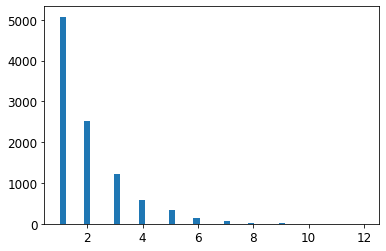

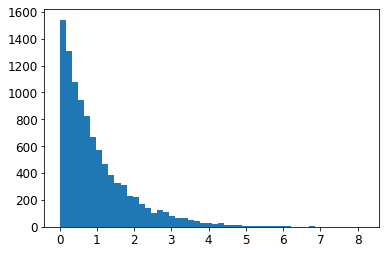

In [ ]:
from scipy.stats import geom, expon
geom_distrib=geom(0.5).rvs(10000, random_state=42)
expon_distrib=expon(scale=1).rvs(10000, random_state=42) # exponential continuous dist. y=exp(-x)
plt.hist(geom_distrib, bins=50)
plt.show()
plt.hist(expon_distrib, bins=50)
plt.show()

## Exercise

In [ ]:
# multiple inheritance
class Family:
    familyword = ""
    def show_family(self):
        print("This is our family:")
 
# Father class inherited from Family
class Father(Family):
    fathername = ""
    def show_father(self):
        print(self.fathername)
 
# Mother class inherited from Family
class Mother(Family):
    mothername = ""
    def show_mother(self):
        print(self.mothername)
 
# Son class inherited from Father and Mother classes
class Son(Father, Mother):
    sonname = ""
    def show_parent(self):
        print("Father :", self.fathername)
        print("Mother :", self.mothername)
        print("Son :", self.sonname)
        return 10
 
s1 = Son()  # Object of Son class
s1.familyword = "truth"
s1.fathername = "Mark"
s1.mothername = "Sonia"
s1.sonname = "Michael"

In [ ]:
s1.familyword, s1.fathername, s1.mothername, s1.sonname

('truth', 'Mark', 'Sonia', 'Michael')

In [ ]:
s1.show_family(), s1.show_father(), s1.show_mother(), s1.show_parent(), "\n"

This is our family:
Mark
Sonia
Father : Mark
Mother : Sonia
Son : Michael


(None, None, None, 10, '\n')

In [ ]:
s2 = Father()
s2.fathername = "Hello"
s2.show_father()

Hello


one more example

In [ ]:
class Parent:
    def __init__(self, p1, p2):
        '''super()를 사용하지 않으면 overriding 됨'''
        self.p1 = p1
        self.p2 = p2
    p3 = "Dummy"

class Child(Parent):
    def __init__(self, c1, **kwargs):
        # super(Child, self).__init__(**kwargs)  # Parent class 의 __init__() 에 있는 class 변수 가지고 옴
        self.c1 = c1
        self.c2 = "This is Child's c2"
        self.c3 = "This is Child's c3"

In [ ]:
child = Child(p1="This is Parent's p1", 
	          p2="This is Parent's p1", 
              c1="This is Child's c1")

In [ ]:
child.p3, child.c1, child.c2, child.c3

('Dummy', "This is Child's c1", "This is Child's c2", "This is Child's c3")

In [ ]:
child.p1, child.p2, child.p3, child.c1, child.c2, child.c3

AttributeError: ignored

In [ ]:
dir(child)  # to see which variables are defined (try with/without super())

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'c1',
 'c2',
 'c3',
 'p3']

Translates slice objects to concatenation along the second axis.

In [ ]:
# np.c_
a, b = np.array([1,2,3]), np.array([4,5,6])

In [ ]:
np.c_[a,b]

array([[1, 4],
       [2, 5],
       [3, 6]])

In [ ]:
np.r_[a,b]

array([1, 2, 3, 4, 5, 6])

In [ ]:
np.concatenate([a,b])

array([1, 2, 3, 4, 5, 6])

In [ ]:
np.column_stack([a,b])

array([[1, 4],
       [2, 5],
       [3, 6]])

In [ ]:
a = np.arange(18).reshape(6,3)
a

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14],
       [15, 16, 17]])

In [ ]:
x, y = a[:,0]/a[:,2], a[:,1]/a[:,2]
x,y

(array([0.        , 0.6       , 0.75      , 0.81818182, 0.85714286,
        0.88235294]),
 array([0.5       , 0.8       , 0.875     , 0.90909091, 0.92857143,
        0.94117647]))

In [ ]:
np.c_[x, y]

array([[0.        , 0.5       ],
       [0.6       , 0.8       ],
       [0.75      , 0.875     ],
       [0.81818182, 0.90909091],
       [0.85714286, 0.92857143],
       [0.88235294, 0.94117647]])

In [ ]:
np.c_[a, x, y]   # translate slice objects to concatenation  along the second axis

array([[ 0.        ,  1.        ,  2.        ,  0.        ,  0.5       ],
       [ 3.        ,  4.        ,  5.        ,  0.6       ,  0.8       ],
       [ 6.        ,  7.        ,  8.        ,  0.75      ,  0.875     ],
       [ 9.        , 10.        , 11.        ,  0.81818182,  0.90909091],
       [12.        , 13.        , 14.        ,  0.85714286,  0.92857143],
       [15.        , 16.        , 17.        ,  0.88235294,  0.94117647]])

In [ ]:
np.r_[x, y].round(2) # along the first axis

array([0.  , 0.6 , 0.75, 0.82, 0.86, 0.88, 0.5 , 0.8 , 0.88, 0.91, 0.93,
       0.94])

In [ ]:
np.r_[[x], [y]].round(2)

array([[0.  , 0.6 , 0.75, 0.82, 0.86, 0.88],
       [0.5 , 0.8 , 0.88, 0.91, 0.93, 0.94]])

In [ ]:
np.c_[[x], [y]].round(2)

array([[0.  , 0.6 , 0.75, 0.82, 0.86, 0.88, 0.5 , 0.8 , 0.88, 0.91, 0.93,
        0.94]])

### Using Pipeline

- Pipeline: 
  - Sequentially apply a list of transforms and a final estimator. 
  - Intermediate steps of the pipeline must be **transform**, that is, they must implement **fit and transform** methods. 
  - The final estimator only needs to implement **fit**. 
  - The transformers in the pipeline can be cached using memory argument.

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0)

In [ ]:
pipe = Pipeline([('scaler', StandardScaler()), 
                 ('svc', SVC())])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test), pipe.score(X_train, y_train)

(0.88, 0.96)

#### Pipeline 없이 진행

In [ ]:
# train
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
svc = SVC()
svc.fit(X_train, y_train)
# test
X_test = sc.transform(X_test)
svc.score(X_test, y_test), svc.score(X_train, y_train)

(0.88, 0.96)

### Using ColumnTransformer

- ColumnTransformer
  - The ColumnTransformer helps performing different transformations for different columns of the data, within a Pipeline that is safe from data leakage and that can be parametrized. 
  - ColumnTransformer works on arrays, sparse matrices, and pandas DataFrames.

In [ ]:
import pandas as pd
X = pd.DataFrame(
     {'city': ['London', 'London', 'Paris', 'Moscow'],
      'title': ["His Last Bow", "How Watson Learned the Trick",
                "A Moveable Feast", "The Grapes of Wrath"],
      'avg_sales': [270.3, 370.2, 458.1, 397.4],
      'avg_miles': [14.2, 24.1, 15.2, 20.7]})
X

,city,title,avg_sales,avg_miles
0,London,His Last Bow,270.3,14.2
1,London,How Watson Learned the Trick,370.2,24.1
2,Paris,A Moveable Feast,458.1,15.2
3,Moscow,The Grapes of Wrath,397.4,20.7


- (continued)
  - Suppose we want to use Onehotencoder for the column 'city', and CountVectorizer for 'title'

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder
column_trans = ColumnTransformer(
    [('city_category', OneHotEncoder(dtype='int'),['city']),
     ('title_bow', CountVectorizer(), 'title')],
    remainder='drop')

In [ ]:
column_trans.fit(X)

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('city_category',
                                 OneHotEncoder(categories='auto', drop=None,
                                               dtype='int',
                                               handle_unknown='error',
                                               sparse=True),
                                 ['city']),
                                ('title_bow',
                                 CountVectorizer(analyzer='word', binary=False,
                                                 decode_error='strict',
                                                 dtype=<class 'numpy.int64'>,
                                                 encoding='utf-8',
                                                 input='content',
                                                 lowercase=True, max_df=1.0,
                                    

In [ ]:
column_trans.get_feature_names()

['city_category__x0_London',
 'city_category__x0_Moscow',
 'city_category__x0_Paris',
 'title_bow__bow',
 'title_bow__feast',
 'title_bow__grapes',
 'title_bow__his',
 'title_bow__how',
 'title_bow__last',
 'title_bow__learned',
 'title_bow__moveable',
 'title_bow__of',
 'title_bow__the',
 'title_bow__trick',
 'title_bow__watson',
 'title_bow__wrath']

In [ ]:
column_trans.transform(X)[:-2].toarray()

array([[1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0]])

In [ ]:
column_trans.fit_transform(X).toarray()

array([[1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0],
       [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1]], dtype=int64)

#### ColumnTransformer 없이 진행

In [ ]:
X

,city,title,avg_sales,avg_miles
0,London,His Last Bow,270.3,14.2
1,London,How Watson Learned the Trick,370.2,24.1
2,Paris,A Moveable Feast,458.1,15.2
3,Moscow,The Grapes of Wrath,397.4,20.7


In [ ]:
X_num = X[['avg_sales','avg_miles']]
X_cat = X['city']
X_bow = X['title']

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_num_tr = sc.fit_transform(X_num).round(2)

In [ ]:
bow = CountVectorizer()
X_bow_tr = bow.fit_transform(X_bow).toarray()

In [ ]:
ohe = OneHotEncoder()
X_cat_tr = ohe.fit_transform(X_cat.values.reshape(-1,1)).toarray()

In [ ]:
type(X_num_tr), type(X_cat_tr), type(X_bow_tr)

(numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [ ]:
X_all = np.concatenate([X_num_tr, X_cat_tr, X_bow_tr], axis=1)
X_all

array([[-1.53, -1.07,  1.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  1.  ,
         0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [-0.06,  1.37,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         1.  ,  0.  ,  1.  ,  0.  ,  0.  ,  1.  ,  1.  ,  1.  ,  0.  ],
       [ 1.24, -0.83,  0.  ,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.35,  0.53,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  1.  ,  0.  ,  0.  ,  1.  ]])

In [ ]:
print(X_num.columns)
print(ohe.get_feature_names())
print(bow.get_feature_names())

Index(['avg_sales', 'avg_miles'], dtype='object')
['x0_London' 'x0_Moscow' 'x0_Paris']
['bow', 'feast', 'grapes', 'his', 'how', 'last', 'learned', 'moveable', 'of', 'the', 'trick', 'watson', 'wrath']


In [ ]:
cols = np.r_[X_num.columns, ohe.get_feature_names(), bow.get_feature_names()]
cols

array(['avg_sales', 'avg_miles', 'x0_London', 'x0_Moscow', 'x0_Paris',
       'bow', 'feast', 'grapes', 'his', 'how', 'last', 'learned',
       'moveable', 'of', 'the', 'trick', 'watson', 'wrath'], dtype=object)

In [ ]:
X_all_df = pd.DataFrame(X_all,
                        columns = cols)
X_all_df

,avg_sales,avg_miles,x0_London,x0_Moscow,x0_Paris,bow,feast,grapes,his,how,last,learned,moveable,of,the,trick,watson,wrath
0,-1.53,-1.07,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.06,1.37,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
2,1.24,-0.83,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.35,0.53,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


In [ ]:
X_all_df.shape

(4, 18)

## Altogether 

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import urllib.request
import tarfile
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

class CombinedAttributesAdder(): # fit과 transform 메서드를 정의해야 함 -> Pipeline에 사용
    def fit(self, X, y=None): # 아무것도 안 함
        return self  
    def transform(self, X): # 특징을 유의미한 값으로 변환
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]

        X = np.delete(X, [households_ix, rooms_ix, population_ix, bedrooms_ix], 1)

        return np.c_[X, rooms_per_household, population_per_household,
                    bedrooms_per_room]

                    
'''데이터셋 가져오기'''
url = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz"
urllib.request.urlretrieve(url, "housing.tgz")
tar = tarfile.open("housing.tgz")
tar.extractall()
tar.close()
housing = pd.read_csv("housing.csv")

'''데이터셋 분리'''
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

split = StratifiedShuffleSplit(test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    #strat_train_set = housing.loc[housing.index.intersection(train_index),:]  # pandas recommend?
    #strat_test_set = housing.loc[housing.index.intersection(test_index),:]

'''데이터 전처리'''
housing = strat_train_set.drop("median_house_value", axis=1)   # drop labels for training set
housing_labels = strat_train_set["median_house_value"].copy()  # 집값이 예측값

col_names = ["total_rooms", "total_bedrooms", "population", "households"] # 한 구역의 total 값은 예측에 도움이 안 됨
rooms_ix, bedrooms_ix, population_ix, households_ix = [
    housing.columns.get_loc(c) for c in col_names] # get the column indices

attr_adder = CombinedAttributesAdder()
# housing_extra_attribs = attr_adder.transform(housing.values)

'''
using Pipeline!
여러 단계의 전처리를 하나의 Pipeline 인스턴스로 생성
- 마지막 인스턴스를 제외하고는 모두 fit과 transform 메서드를 가져야 함
- 마지막 인스턴스는 fit 메서드를 가져야 함
'''
# numerical data애 댜헌 파이프라인
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")), # Imputing
        ('attribs_adder', CombinedAttributesAdder()),  # Feature replace
        ('std_scaler', StandardScaler()),              # Scaling
    ])

housing_num = housing.drop("ocean_proximity", axis=1)
# housing_num_tr = num_pipeline.fit_transform(housing_num)

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

# 최종 전체 파이프라인
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),    # numerical data는 num_pipeline 사용
        ("cat", OneHotEncoder(), cat_attribs), # categorical data는 onehotencoding 사용
    ])

housing_prepared = full_pipeline.fit_transform(housing)

'''모델 훈련'''
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_r2 = r2_score(housing_labels, housing_predictions)
print("Performance for Train dataset: ", lin_mse, np.sqrt(lin_mse), lin_r2)

'''모델 테스트(성능 평가)'''
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = lin_reg.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
print("Final performance evaluation: ", final_mse, np.sqrt(final_mse), lin_reg.score(X_test_prepared, y_test))

Performance for Train dataset:  5001073666.967282 70718.26968306904 0.6241096275422756
Final performance evaluation:  5315171527.142866 72905.22290716122 0.6021304523441475
